In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
data = pd.read_csv('/content/Student-Employability-Datasets.csv')

In [8]:
data.head()

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable
4,Student 5,4,4,3,3,4,4,3,5,Employable


In [9]:
data.replace({'CLASS': {'Employable': 1, 'LessEmployable': 0}}, inplace=True)

<ipython-input-9-b5b3712fa36b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'CLASS': {'Employable': 1, 'LessEmployable': 0}}, inplace=True)


In [10]:
data.head()

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,1
1,Student 2,4,4,4,4,4,4,3,5,1
2,Student 3,4,3,3,3,3,3,2,5,0
3,Student 4,3,3,3,2,3,3,3,5,0
4,Student 5,4,4,3,3,4,4,3,5,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Name of Student             2982 non-null   object
 1   GENERAL APPEARANCE          2982 non-null   int64 
 2   MANNER OF SPEAKING          2982 non-null   int64 
 3   PHYSICAL CONDITION          2982 non-null   int64 
 4   MENTAL ALERTNESS            2982 non-null   int64 
 5   SELF-CONFIDENCE             2982 non-null   int64 
 6   ABILITY TO PRESENT IDEAS    2982 non-null   int64 
 7   COMMUNICATION SKILLS        2982 non-null   int64 
 8   Student Performance Rating  2982 non-null   int64 
 9   CLASS                       2982 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 233.1+ KB


In [12]:
data.shape

(2982, 10)

In [13]:
data.describe()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
count,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000
mean,4.246814,3.884641,3.972166,3.962777,3.910798,3.813883,3.525486,4.610664,0.579812
std,0.678501,0.757013,0.744135,0.781982,0.807602,0.739390,0.743881,0.692845,0.493672
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.000000
25%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,1.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


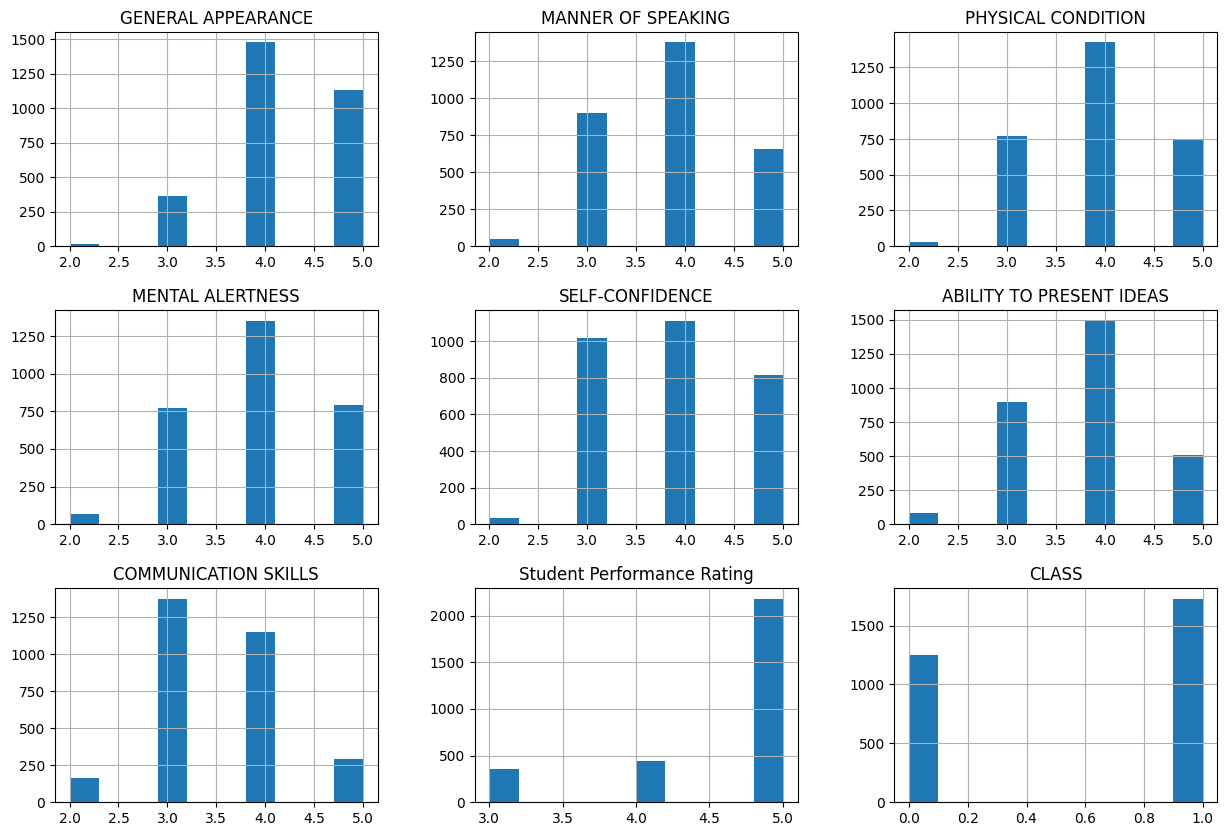

In [14]:
data.select_dtypes('number').hist(figsize = (15,10))
plt.show()

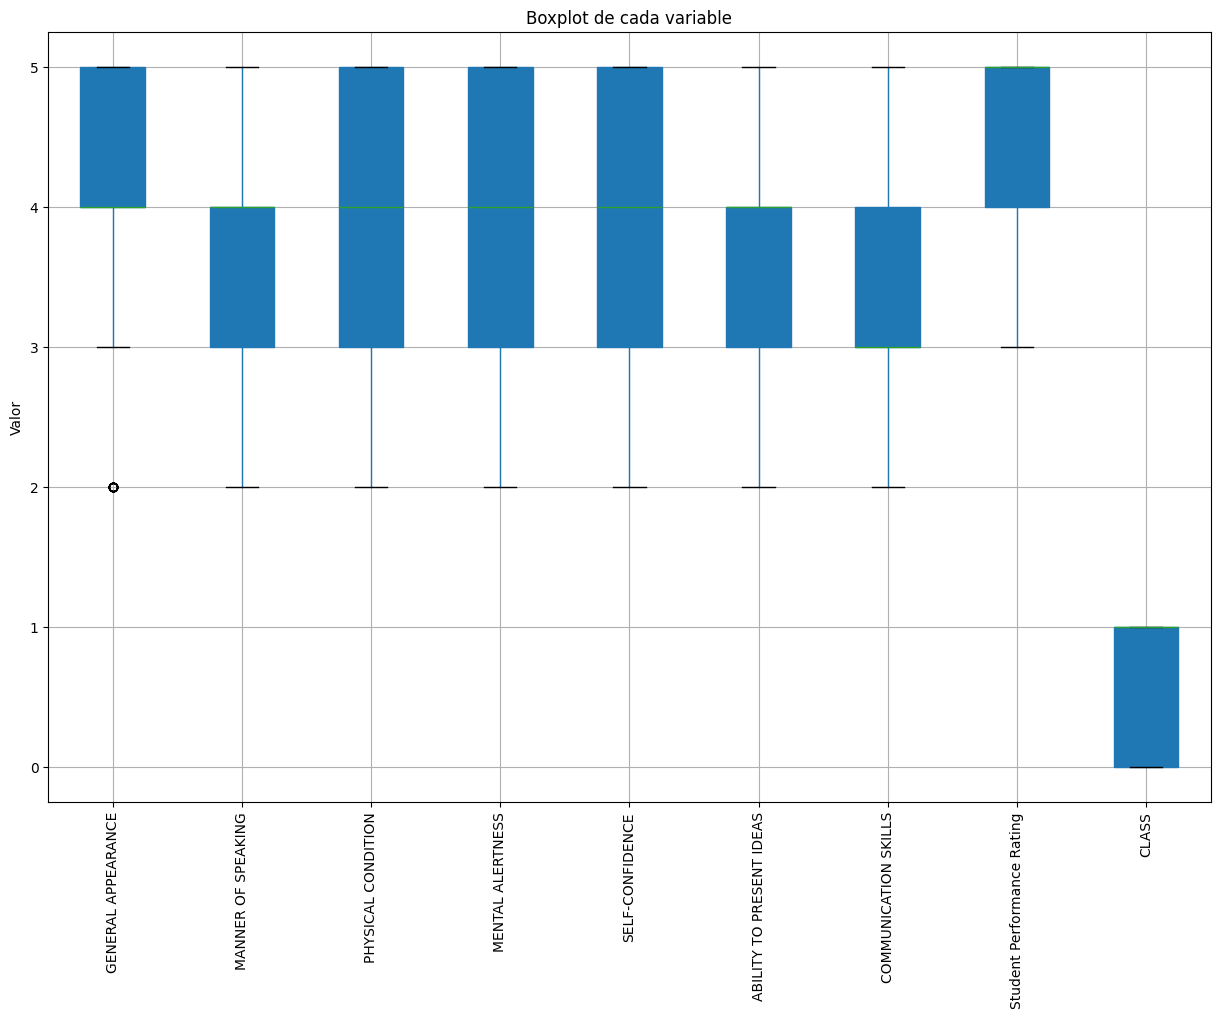

In [15]:
data.boxplot(figsize = (15,10), patch_artist = True)
plt.title('Boxplot de cada variable')
plt.xticks(rotation = 90)
plt.ylabel('Valor')
plt.show()

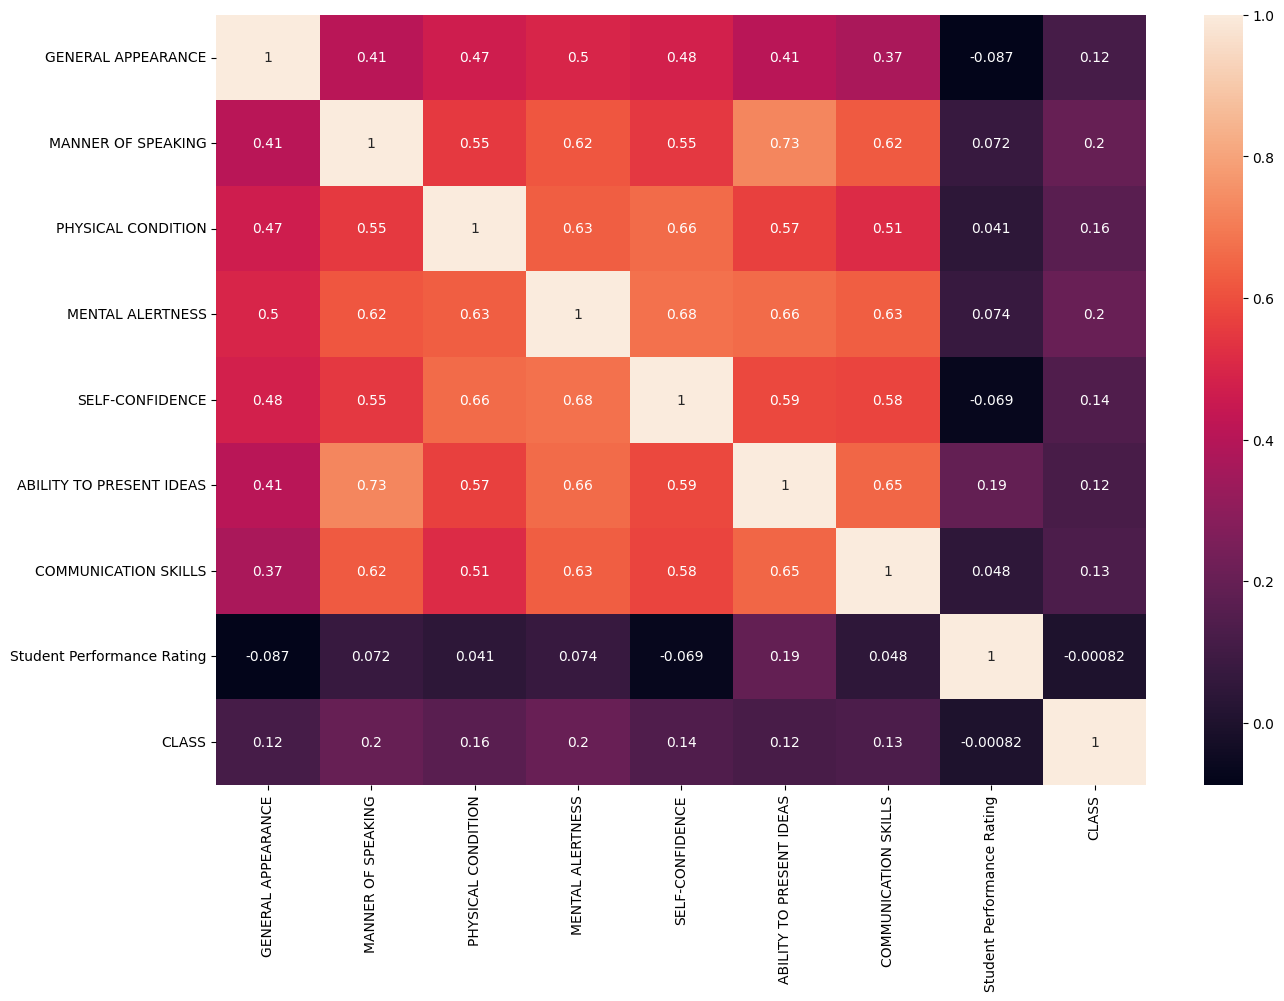

In [16]:
plt.figure(figsize = (15,10))
data_numeric = data.select_dtypes('number')
sns.heatmap(data_numeric.corr(), annot = True)
plt.show()

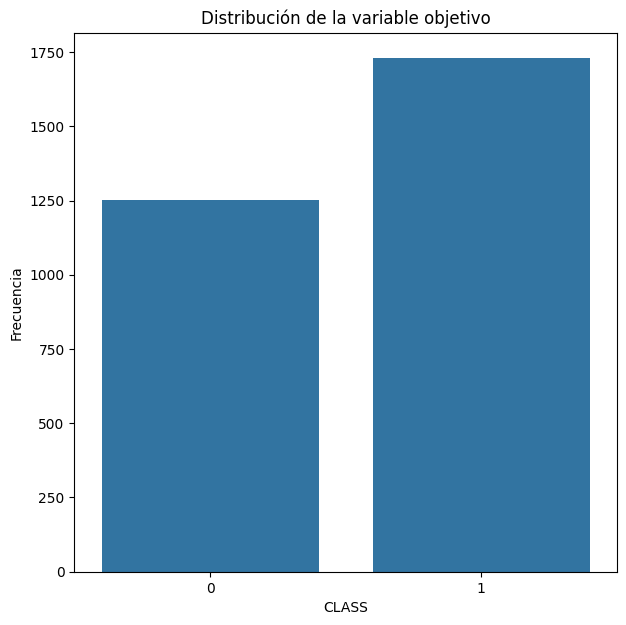

In [17]:
plt.figure(figsize = (7,7))
plt.title('Distribución de la variable objetivo')
sns.countplot(x = data['CLASS'], data = data)
plt.ylabel('Frecuencia')
plt.show()

In [19]:
X = data.drop(['CLASS', 'Name of Student'], axis = 1)
y = data['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 1. Decision Tree


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
scoredtc = accuracy_score(y_test, y_pred_dtc)
print('Accuracy Score: ', scoredtc)

Accuracy Score:  0.9095477386934674


AUC Score:  0.9818936121845875
AUC Score (usando roc_auc_score):  0.9818936121845875


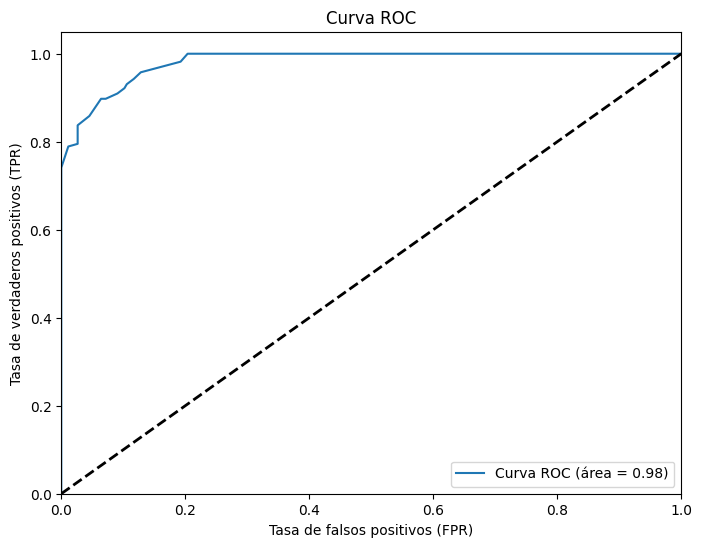

In [22]:
y_pred_proba = dtc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("AUC Score: ", roc_auc)
print("AUC Score (usando roc_auc_score): ", roc_auc_score(y_test, y_pred_proba))

# Graficamos la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


In [23]:
cm = confusion_matrix(y_test, y_pred_dtc)
print("Matriz de Confusión:")
print(cm)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_dtc))

Matriz de Confusión:
[[241  24]
 [ 30 302]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       265
           1       0.93      0.91      0.92       332

    accuracy                           0.91       597
   macro avg       0.91      0.91      0.91       597
weighted avg       0.91      0.91      0.91       597



## 2. Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier().fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
score_rfc = accuracy_score(y_test, y_pred_rfc)
print('Accuracy Score: ', score_rfc)

Accuracy Score:  0.9112227805695142


AUC Score:  0.9818367810866105
AUC Score (usando roc_auc_score):  0.9818367810866105


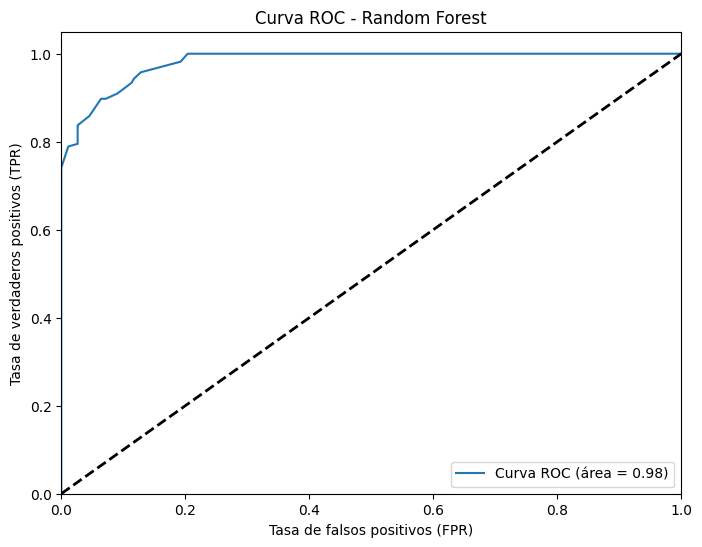

In [28]:
y_pred_proba = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("AUC Score: ", roc_auc)
print("AUC Score (usando roc_auc_score): ", roc_auc_score(y_test, y_pred_proba))

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()


In [29]:
# Matriz de confusión y reporte de clasificación
cm = confusion_matrix(y_test, y_pred_rfc)
print("Matriz de Confusión:")
print(cm)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rfc))


Matriz de Confusión:
[[238  27]
 [ 26 306]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       265
           1       0.92      0.92      0.92       332

    accuracy                           0.91       597
   macro avg       0.91      0.91      0.91       597
weighted avg       0.91      0.91      0.91       597



## 3. Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
score_lr = accuracy_score(y_test, y_pred_lr)
print('Accuracy Score: ', score_lr)

Accuracy Score:  0.5946398659966499


AUC Score:  0.6394635144350989
AUC Score (usando roc_auc_score):  0.6394635144350989


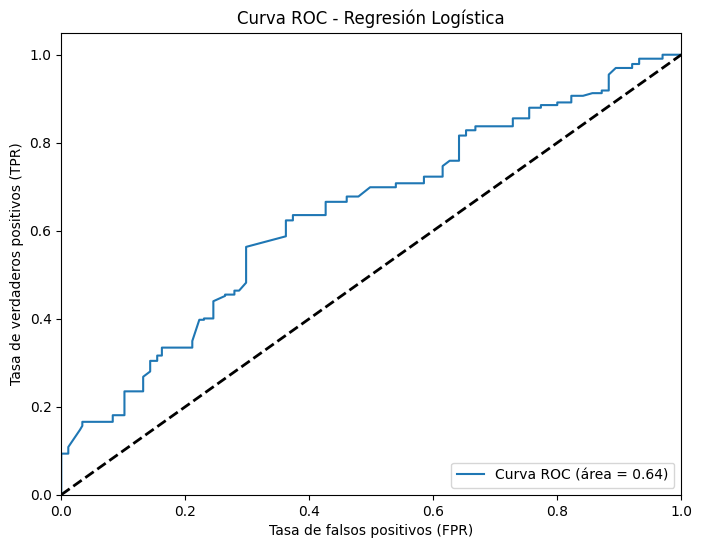

In [33]:
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
print("AUC Score: ", roc_auc_lr)
print("AUC Score (usando roc_auc_score): ", roc_auc_score(y_test, y_pred_proba_lr))

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Curva ROC (área = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc="lower right")
plt.show()


In [32]:
# Matriz de Confusión y Reporte de Clasificación
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Matriz de Confusión:")
print(cm_lr)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_lr))


Matriz de Confusión:
[[ 95 170]
 [ 72 260]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.57      0.36      0.44       265
           1       0.60      0.78      0.68       332

    accuracy                           0.59       597
   macro avg       0.59      0.57      0.56       597
weighted avg       0.59      0.59      0.57       597



## 4. KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
# Entrenamiento del modelo KNN
knn = KNeighborsClassifier().fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
score_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy Score: ', score_knn)

Accuracy Score:  0.8844221105527639


AUC Score:  0.9697658558763357
AUC Score (usando roc_auc_score):  0.9697658558763357


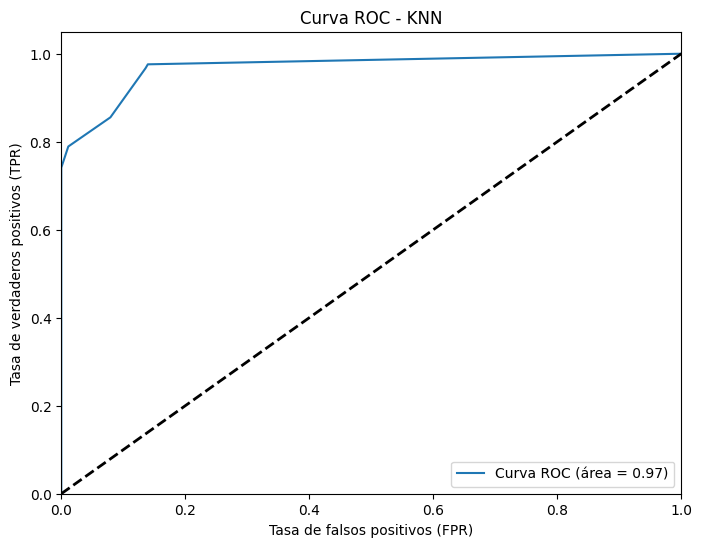

In [35]:
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
print("AUC Score: ", roc_auc_knn)
print("AUC Score (usando roc_auc_score): ", roc_auc_score(y_test, y_pred_proba_knn))

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label='Curva ROC (área = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - KNN')
plt.legend(loc="lower right")
plt.show()


In [36]:
# Matriz de confusión y reporte de clasificación
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Matriz de Confusión:")
print(cm_knn)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_knn))


Matriz de Confusión:
[[244  21]
 [ 48 284]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       265
           1       0.93      0.86      0.89       332

    accuracy                           0.88       597
   macro avg       0.88      0.89      0.88       597
weighted avg       0.89      0.88      0.88       597



## 5. SVM

In [38]:
from sklearn.svm import SVC

svm = SVC(probability=True).fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
score_svm = accuracy_score(y_test, y_pred_svm)
print('Accuracy Score: ', score_svm)

Accuracy Score:  0.8492462311557789


AUC Score:  0.8958058649693112
AUC Score (usando roc_auc_score):  0.8958058649693112


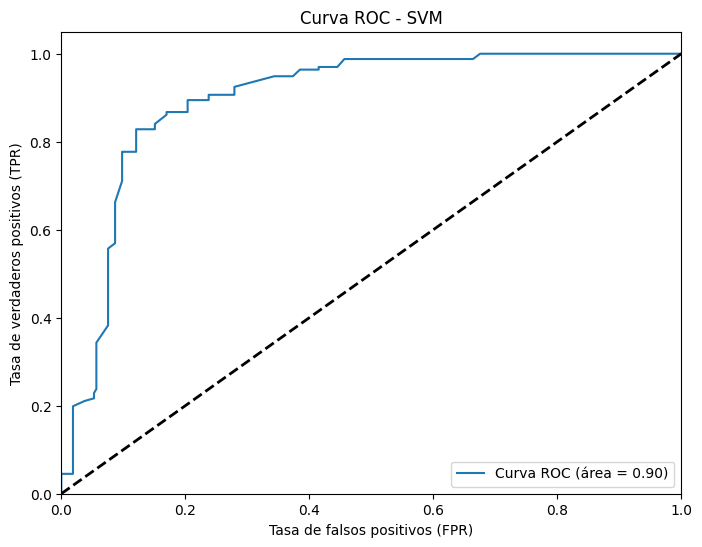

In [39]:
y_pred_proba_svm = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
print("AUC Score: ", roc_auc_svm)
print("AUC Score (usando roc_auc_score): ", roc_auc_score(y_test, y_pred_proba_svm))

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label='Curva ROC (área = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - SVM')
plt.legend(loc="lower right")
plt.show()

In [40]:
# Matriz de confusión y reporte de clasificación
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Matriz de Confusión:")
print(cm_svm)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_svm))

Matriz de Confusión:
[[210  55]
 [ 35 297]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       265
           1       0.84      0.89      0.87       332

    accuracy                           0.85       597
   macro avg       0.85      0.84      0.85       597
weighted avg       0.85      0.85      0.85       597



## 6. GBM

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier().fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
score_gbc = accuracy_score(y_test, y_pred_gbc)
print('Accuracy Score: ', score_gbc)

Accuracy Score:  0.8174204355108877


AUC Score:  0.9003864514662423
AUC Score (usando roc_auc_score):  0.9003864514662423


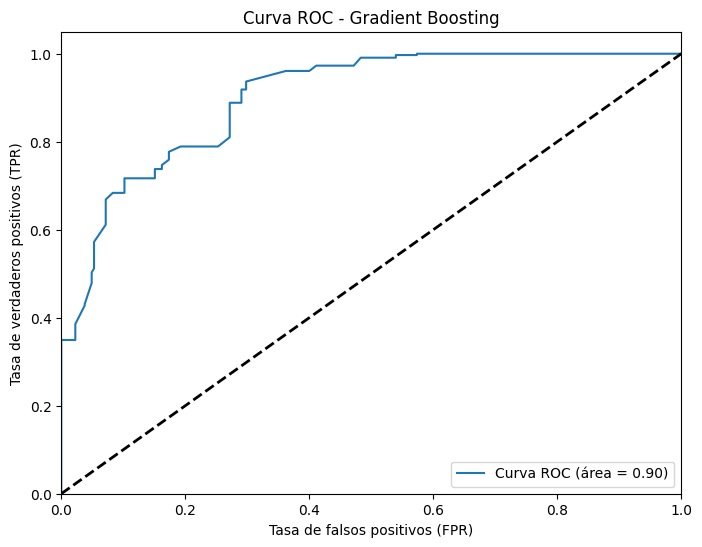

In [43]:
y_pred_proba_gbc = gbc.predict_proba(X_test)[:, 1]
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test, y_pred_proba_gbc)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)
print("AUC Score: ", roc_auc_gbc)
print("AUC Score (usando roc_auc_score): ", roc_auc_score(y_test, y_pred_proba_gbc))

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_gbc, tpr_gbc, label='Curva ROC (área = %0.2f)' % roc_auc_gbc)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()


In [44]:
# Matriz de confusión y reporte de clasificación
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
print("Matriz de Confusión:")
print(cm_gbc)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_gbc))


Matriz de Confusión:
[[188  77]
 [ 32 300]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.71      0.78       265
           1       0.80      0.90      0.85       332

    accuracy                           0.82       597
   macro avg       0.83      0.81      0.81       597
weighted avg       0.82      0.82      0.81       597



## Interpretación de resultados

En el contexto del dataset, la contratación de buenos candidatos y el rechazo de malos candidatos es igual de importante, es necesario tener un balance entre estas dos métricas para lograr un modelo efectivo, por ello me basaré en F1-score, accuracy y las métricas de la curva ROC para la comparación de los modelos. Los mejores modelos en los tres marcadores seleccionados son Decision Tree y Random Forest, de entre los dos, el Random Forest supera en accuracy score al Decision tree por lo que se muestra como el mejor modelo en el contexto del dataset.
